# Vorbereitung

## Pakete laden

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler    # Standardisiert Features (Mittelwert=0, Varianz=1) für vergleichbare Skalen

## Daten laden und explorieren

### Daten laden

In [113]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
print(type(y))

X_names = cancer.feature_names
y_names = cancer.target_names

<class 'numpy.ndarray'>


In [114]:
# Welche Form haben die Daten?
print("Shape of X:", X.shape)
print("Shape of y:", y.shape,"\n")

print("Feature names: ", X_names,"\n")
print("Target names: ", y_names, "\n")

Shape of X: (569, 30)
Shape of y: (569,) 

Feature names:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension'] 

Target names:  ['malignant' 'benign'] 



### Daten ausgeben

In [115]:
# Ein DataFrame aus den Daten erstellen für eine schönere Ausgabe
X_part = pd.DataFrame(X, columns=X_names)
y_part = pd.Series(y, name="target")
cancer_df = pd.concat([X_part, y_part], axis=1)

print(cancer_df.head(n=12).to_markdown(floatfmt=".2f"))

|    |   mean radius |   mean texture |   mean perimeter |   mean area |   mean smoothness |   mean compactness |   mean concavity |   mean concave points |   mean symmetry |   mean fractal dimension |   radius error |   texture error |   perimeter error |   area error |   smoothness error |   compactness error |   concavity error |   concave points error |   symmetry error |   fractal dimension error |   worst radius |   worst texture |   worst perimeter |   worst area |   worst smoothness |   worst compactness |   worst concavity |   worst concave points |   worst symmetry |   worst fractal dimension |   target |
|---:|--------------:|---------------:|-----------------:|------------:|------------------:|-------------------:|-----------------:|----------------------:|----------------:|-------------------------:|---------------:|----------------:|------------------:|-------------:|-------------------:|--------------------:|------------------:|-----------------------:|-----------------:

In [116]:
# Beschreibung und statistische Übersicht der Kennzahlen der Daten ansehen
print("\nKennzahlen der Daten:")

print(cancer_df.describe().to_markdown(floatfmt=".3f"))


Kennzahlen der Daten:
|       |   mean radius |   mean texture |   mean perimeter |   mean area |   mean smoothness |   mean compactness |   mean concavity |   mean concave points |   mean symmetry |   mean fractal dimension |   radius error |   texture error |   perimeter error |   area error |   smoothness error |   compactness error |   concavity error |   concave points error |   symmetry error |   fractal dimension error |   worst radius |   worst texture |   worst perimeter |   worst area |   worst smoothness |   worst compactness |   worst concavity |   worst concave points |   worst symmetry |   worst fractal dimension |   target |
|:------|--------------:|---------------:|-----------------:|------------:|------------------:|-------------------:|-----------------:|----------------------:|----------------:|-------------------------:|---------------:|----------------:|------------------:|-------------:|-------------------:|--------------------:|------------------:|--------------

# **PCA durchführen**

Beachten Sie, dass di PCA nur auf den Features und nicht dem target durchgeführt wird!

### **Schritt 1**: Daten standardisieren

In [117]:
## Die Daten standardisieren oder nur zentrieren? true=standardisieren / false=nur zentrieren
standardisieren = True

if (standardisieren):
    # Daten standardisieren
    scaler = StandardScaler()
    X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X_names)
else:
    # Daten zentrieren
    mean_values = X.mean(axis=0)
    X_scaled = pd.DataFrame(X - mean_values, columns=X_names)

print(X_scaled.head(n=20).to_markdown(floatfmt=".3f"))


|    |   mean radius |   mean texture |   mean perimeter |   mean area |   mean smoothness |   mean compactness |   mean concavity |   mean concave points |   mean symmetry |   mean fractal dimension |   radius error |   texture error |   perimeter error |   area error |   smoothness error |   compactness error |   concavity error |   concave points error |   symmetry error |   fractal dimension error |   worst radius |   worst texture |   worst perimeter |   worst area |   worst smoothness |   worst compactness |   worst concavity |   worst concave points |   worst symmetry |   worst fractal dimension |
|---:|--------------:|---------------:|-----------------:|------------:|------------------:|-------------------:|-----------------:|----------------------:|----------------:|-------------------------:|---------------:|----------------:|------------------:|-------------:|-------------------:|--------------------:|------------------:|-----------------------:|-----------------:|----------

### **Schritt 2**: Kovarianz-Matrix, Eigenwerte und Eigenvektoren

#### Kovarianz-Matrix

In [118]:
# Kovarianzmatrix berechnen
cov_matrix = np.cov(X_scaled.T)

print("Kovarianzmatrix-Form:", cov_matrix.shape)

Kovarianzmatrix-Form: (30, 30)


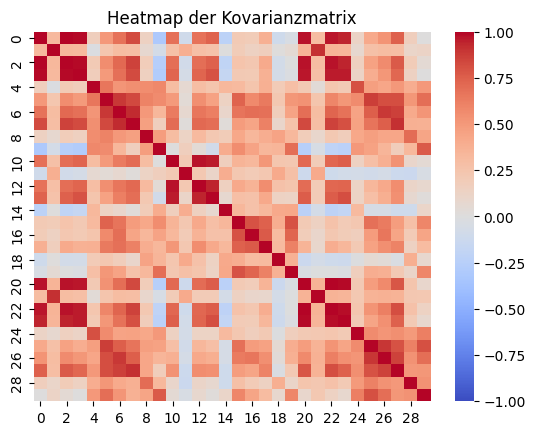

In [119]:
# Kovarianzmatrix plotten
sns.heatmap(
    cov_matrix,
    cmap="coolwarm",
    center=0,
    annot=False,       # Werte als Text anzeigen
    fmt=".2f",        # Format: 2 Nachkommastellen
    annot_kws={"size": 10},  # Schriftgröße der Annotationen
    vmin=-1,  # Untergrenze der Colorbar
    vmax=1    # Obergrenze der Colorbar
)
plt.title("Heatmap der Kovarianzmatrix")
plt.show()

#### Eigenwerte und Eigenvektoren

In [120]:
# Eigenwerte und Eigenvektoren berechnen
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

In [121]:
# Eigenwerte absteigend sortieren
sorted_idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_idx]
eigenvectors = eigenvectors[:, sorted_idx]

### **Schritt 3**: Ladungsmatrix

In [122]:
# Berechnungen
explained_variance = eigenvalues
variance_ratio = eigenvalues / eigenvalues.sum() * 100

# Ladungstabelle erstellen
loadings = pd.DataFrame(
    eigenvectors,
    index=X_names,
    columns=[f'PC{i+1}' for i in range(eigenvectors.shape[1])]
)

# Varianz-Informationen als neue Zeilen hinzufügen
loadings.loc['---'] = ['---'] * len(loadings.columns)  # Trennzeile
loadings.loc['Erklärte Varianz'] = explained_variance
loadings.loc['Anteil (%)'] = variance_ratio


## Loadings Tabelle ausgeben #####
print(loadings.to_markdown(floatfmt=".3f"))

|                         | PC1                   | PC2                   | PC3                  | PC4                    | PC5                   | PC6                    | PC7                    | PC8                    | PC9                    | PC10                  | PC11                  | PC12                  | PC13                  | PC14                   | PC15                  | PC16                  | PC17                  | PC18                  | PC19                   | PC20                  | PC21                  | PC22                  | PC23                   | PC24                  | PC25                  | PC26                   | PC27                  | PC28                    | PC29                   | PC30                    |
|:------------------------|:----------------------|:----------------------|:---------------------|:-----------------------|:----------------------|:-----------------------|:-----------------------|:-----------------------|:----------------

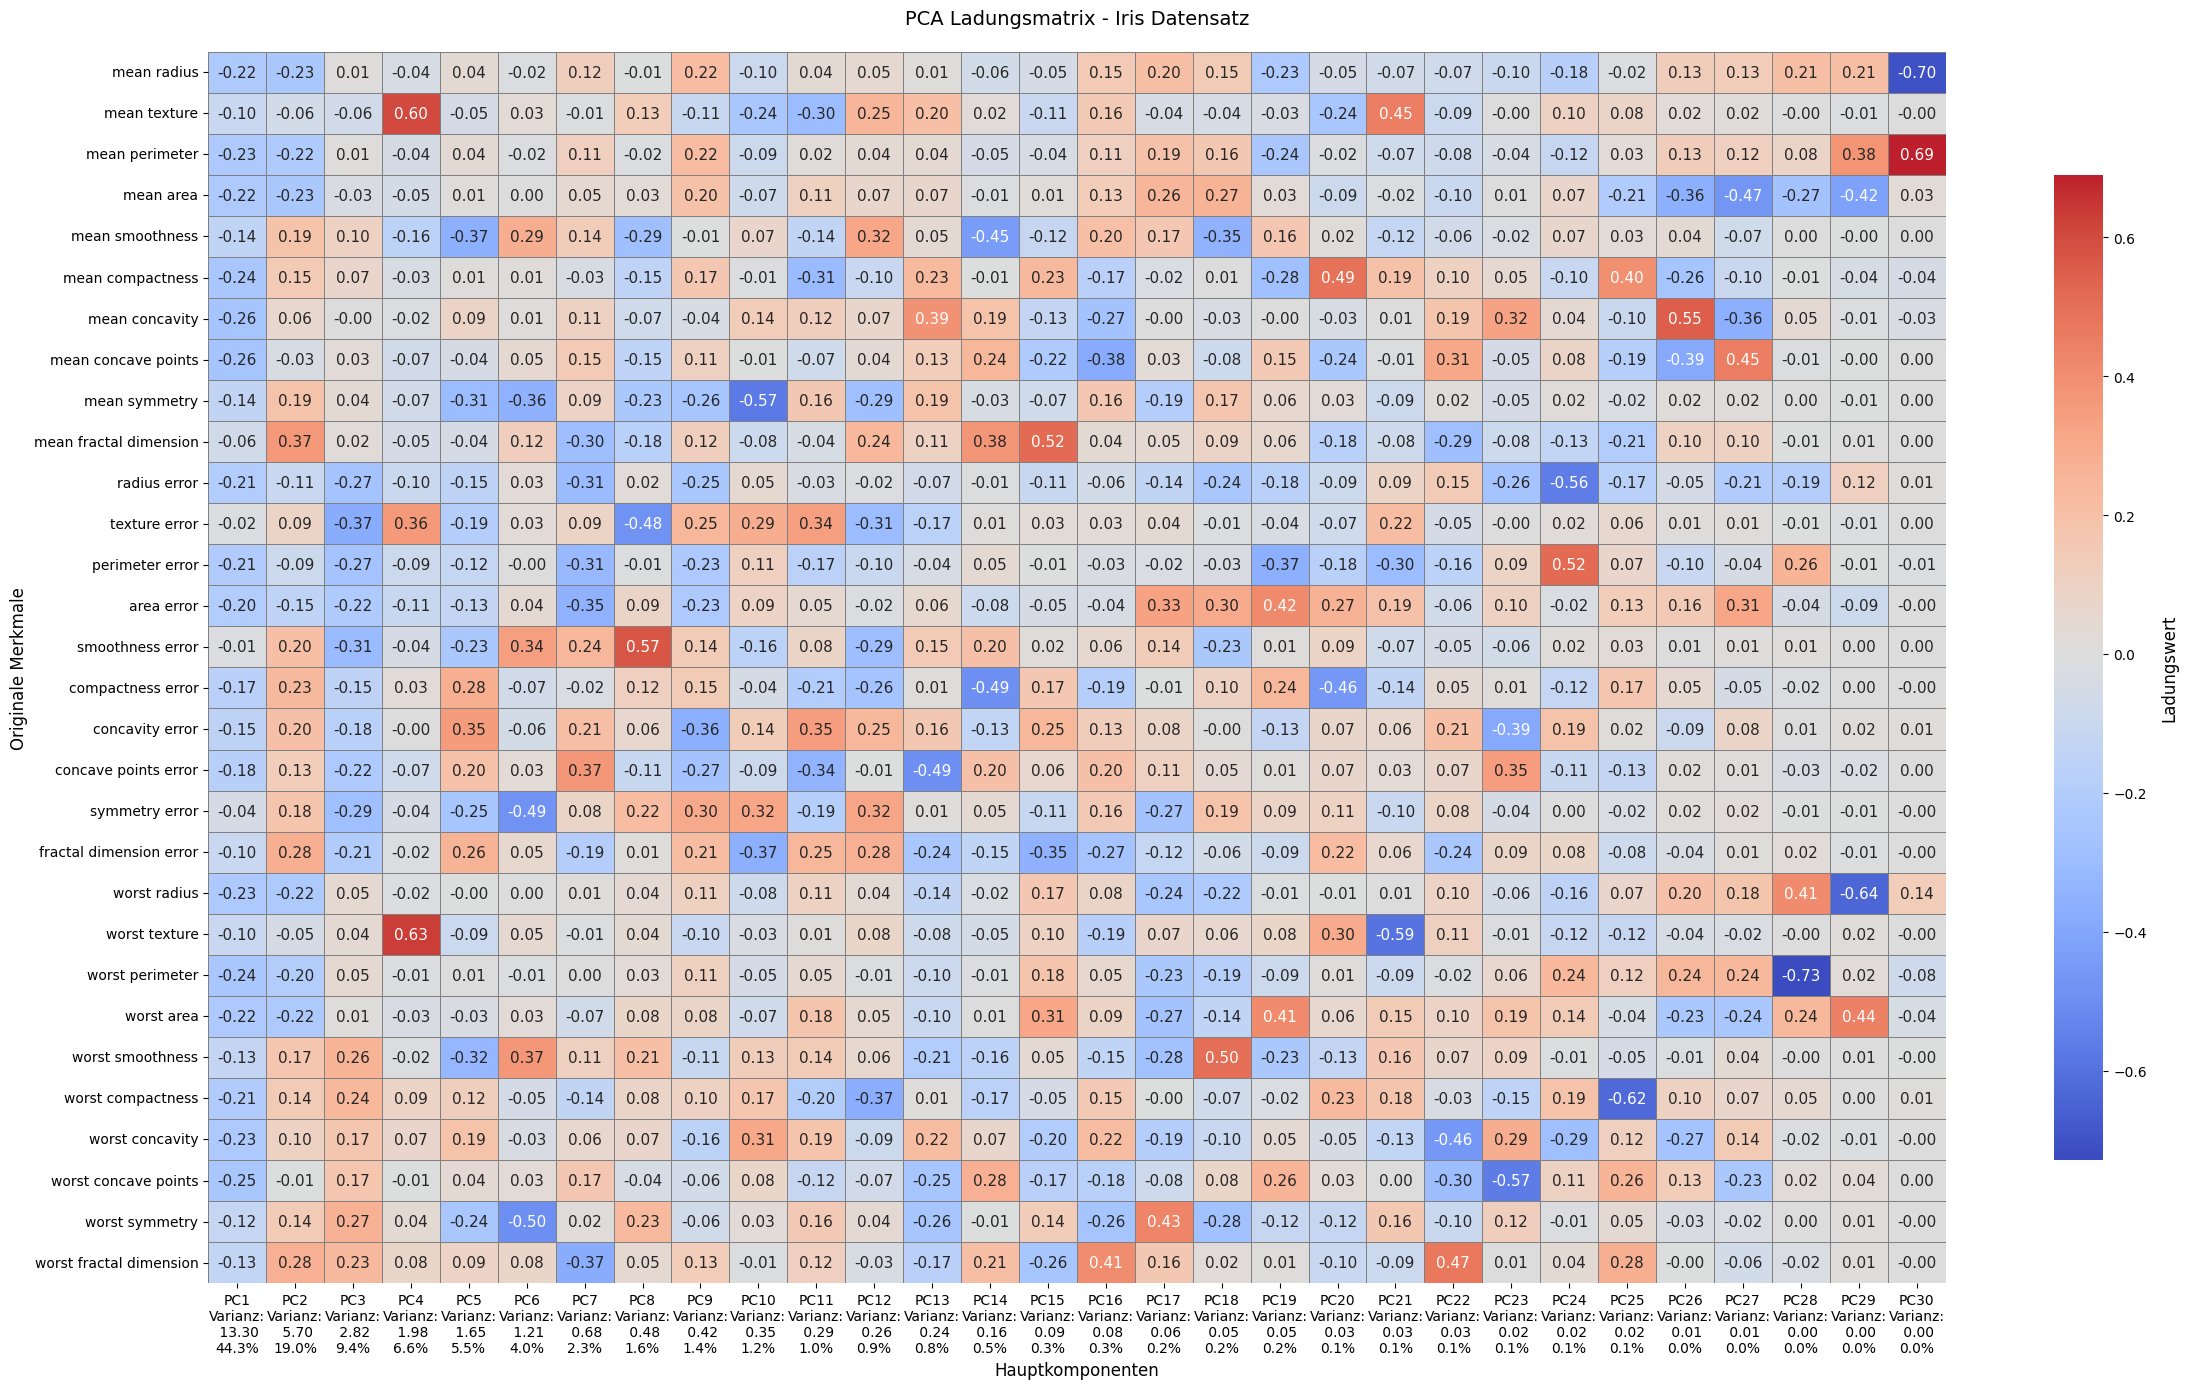

In [123]:
# Daten vorbereiten
heatmap_data = pd.DataFrame(
    eigenvectors,
    index=X_names,
    columns=[f'PC{i+1}' for i in range(eigenvectors.shape[1])]
)

# Heatmap mit transponierter Darstellung
plt.figure(figsize=(24, 14))
ax = sns.heatmap(heatmap_data,  # Nicht transponiert (da wir Achsen manuell anpassen)
                 annot=True,
                 cmap='coolwarm',
                 center=0,
                 fmt=".2f",
                 linewidths=0.5,
                 linecolor='gray',
                 cbar_kws={'label': 'Ladungswert', 'shrink': 0.8},
                 annot_kws={"size": 11})

# Achsen und Titel anpassen
plt.title('PCA Ladungsmatrix - Iris Datensatz', pad=20, fontsize=14)
plt.xlabel('Hauptkomponenten', fontsize=12)  # PCs jetzt oben
plt.ylabel('Originale Merkmale', fontsize=12)  # Features links
plt.xticks(rotation=0)  # Horizontale Beschriftung für PCs

# Farbbalken optimieren
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)
cbar.set_label('Ladungswert', fontsize=12, labelpad=10)

# Varianz-Informationen als zusätzliche X-Achsen-Beschriftung
pc_labels = [f'{col}\nVarianz:\n {var:.2f}\n{ratio:.1f}%'
            for col, var, ratio in zip(heatmap_data.columns, explained_variance, variance_ratio)]
ax.set_xticklabels(pc_labels)

plt.tight_layout()
plt.show()

### **Schritt 4**: Wahl der Hauptkomponenten

#### Scree Plot

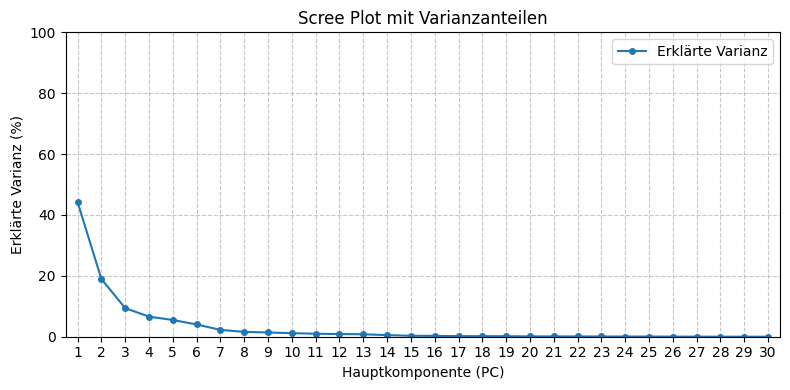

In [124]:
plt.figure(figsize=(8, 4))

num_av_components = len(eigenvectors)

# Berechne erklärte Varianz in %
explained_variance = eigenvalues[:num_av_components] / np.sum(eigenvalues[:num_av_components]) * 100

# Plot mit Prozentangaben (unverändert)
plt.plot(np.arange(1, num_av_components+1), explained_variance, 'o-', markersize=4,
         label='Erklärte Varianz', color='tab:blue')

# Werte an den Punkten anzeigen
#for i, var in enumerate(explained_variance):
#    plt.text(i+1.1, var+2, f'{var:.1f}%',  # +2 für leichten Abstand über dem Punkt
#             ha='center', va='bottom',    # Zentrierte Ausrichtung
#             fontsize=9, color='tab:blue')

# Rest des unveränderten Codes
plt.xlabel('Hauptkomponente (PC)')
plt.ylabel('Erklärte Varianz (%)')
plt.title('Scree Plot mit Varianzanteilen')
plt.xticks(np.arange(1, num_av_components+1))
plt.xlim(0.5, num_av_components + 0.5)
plt.ylim(0, 100)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

#### Kumulierte Varianz

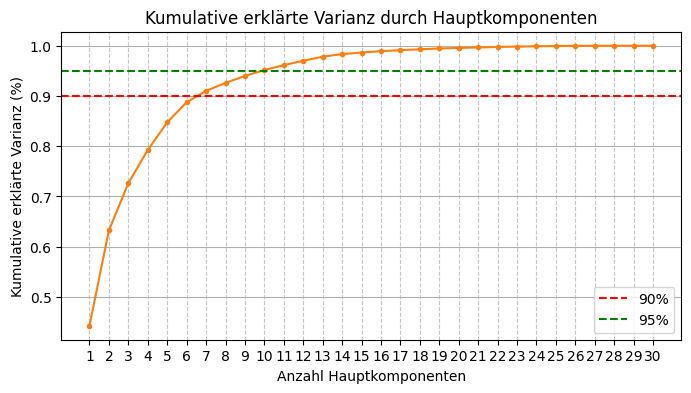

In [125]:
# Kumulierte erklärte Varianz berechnen
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plot der kumulierten Varianz
plt.figure(figsize=(8, 4))

plt.plot(np.arange(1, len(cumulative_variance) + 1),
         cumulative_variance,
         linestyle='-',  # Durchgezogene Linie (Standard)
         linewidth=1.5,   # Etwas dickere Linie für bessere Sichtbarkeit
         marker='o',         # Punkte hinzufügen
         markersize=3,       # Größe der Punkte
         color='tab:orange'
)

plt.axhline(y=0.90, color='r', linestyle='--', label='90%')
plt.axhline(y=0.95, color='g', linestyle='--', label='95%')
plt.xlabel('Anzahl Hauptkomponenten')
plt.xticks(np.arange(1, len(eigenvalues)+1))
plt.ylabel('Kumulative erklärte Varianz (%)')
plt.title('Kumulative erklärte Varianz durch Hauptkomponenten')
plt.legend()

# Grid nur bei den X-Ticks
plt.grid(True, axis='y')  # Horizontale Gridlines immer
plt.grid(True, axis='x', which='major', linestyle='--', alpha=0.7)  # Nur bei Haupt-Ticks
plt.show()

In [126]:
# Komponentenanzahl für 90 % bzw. 95 % Varianz bestimmen
n_90 = np.argmax(cumulative_variance >= 0.90) + 1
n_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Anzahl Komponenten für 90% erklärte Varianz: {n_90}")
print(f"Anzahl Komponenten für 95% erklärte Varianz: {n_95}")

Anzahl Komponenten für 90% erklärte Varianz: 7
Anzahl Komponenten für 95% erklärte Varianz: 10


### **Schritt 5**: Projektion

In [127]:
num_components = max(n_95,2); # n_90 bei 90% erklaerter Varianz

print("Skalierte Daten:",X_scaled.shape)
print("Gewählte Eigenvektoren:",eigenvectors[:, :num_components].shape,"\n")

# Projektion der Daten durch Matrix-Multiplikation der
# skalierten Daten mit der Matrix der gewählten Hauptkomponenten
X_pca = X_scaled.dot(eigenvectors[:, :num_components])

print("Projizierte Datenform:", X_pca.shape)
print(X_pca.head(15).to_markdown(floatfmt=".3f"))

Skalierte Daten: (569, 30)
Gewählte Eigenvektoren: (30, 10) 

Projizierte Datenform: (569, 10)
|    |      0 |      1 |      2 |      3 |      4 |      5 |      6 |      7 |      8 |      9 |
|---:|-------:|-------:|-------:|-------:|-------:|-------:|-------:|-------:|-------:|-------:|
|  0 | -9.193 |  1.949 |  1.123 | -3.634 | -1.195 | -1.411 | -2.159 | -0.398 |  0.157 |  0.877 |
|  1 | -2.388 | -3.768 |  0.529 | -1.118 |  0.622 | -0.029 | -0.013 |  0.241 |  0.712 | -1.107 |
|  2 | -5.734 | -1.075 |  0.552 | -0.912 | -0.177 | -0.541 |  0.668 |  0.097 | -0.024 | -0.454 |
|  3 | -7.123 | 10.276 |  3.233 | -0.153 | -2.961 | -3.053 | -1.430 |  1.060 |  1.405 |  1.117 |
|  4 | -3.935 | -1.948 | -1.390 | -2.941 |  0.547 |  1.226 |  0.936 |  0.636 |  0.264 | -0.378 |
|  5 | -2.380 |  3.950 |  2.935 | -0.941 | -1.056 |  0.451 | -0.490 | -0.165 |  0.133 |  0.530 |
|  6 | -2.239 | -2.690 |  1.640 | -0.149 |  0.040 |  0.129 |  0.302 |  0.084 |  0.080 | -0.219 |
|  7 | -2.143 |  2.340 |  0.872 

#### Visualisierung der Projizierten Daten

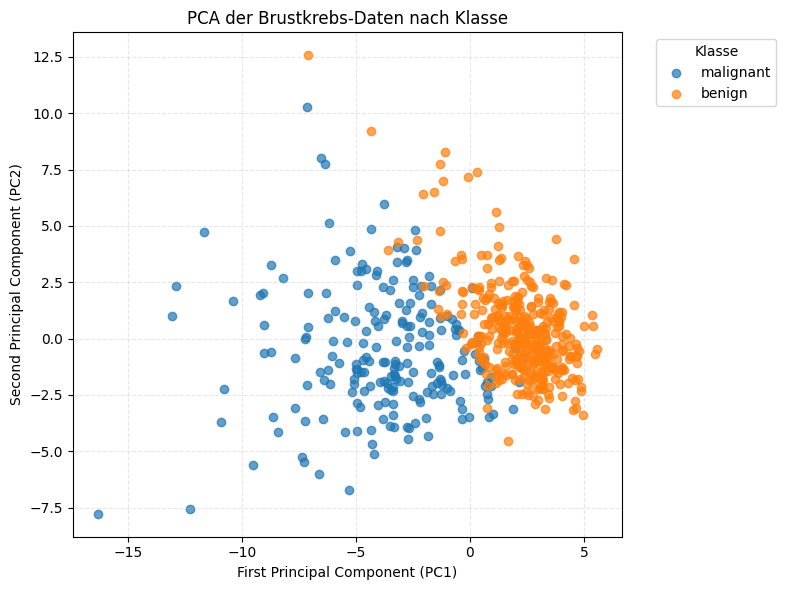

In [128]:
# Plot erstellen
plt.figure(figsize=(8, 6))


# Scatter-Plot mit Farben nach Klasse und Legenden-Labels
for class_id, class_name in enumerate(y_names):
    plt.scatter(
        X_pca.iloc[y == class_id, 0],  # PC1 für malignant/benign
        X_pca.iloc[y == class_id, 1],  # PC2 für malignant/benign
        label=class_name,
        alpha=0.7
    )

# Titel und Achsen
plt.xlabel('First Principal Component (PC1)')
plt.ylabel('Second Principal Component (PC2)')
plt.title('PCA der Brustkrebs-Daten nach Klasse')
plt.grid(True, linestyle='--', alpha=0.3)

# Legende statt Colorbar
plt.legend(title="Klasse", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()  # Verhindert Überlappungen
plt.show()